In [1]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = os.path.join(os.getcwd(), 'data')

datasets = []

for file in os.listdir(data_path):
    key = os.path.splitext(file)[0]
    globals()[key] = pd.read_csv(os.path.join(data_path, file))
    datasets.append(globals()[key])

# Datasets' first impression

## `n2k` (need to know)

In [3]:
n2k_data

,track,traction,track_evolution,braking,asphalt_grip,lateral,asphalt_abrasion,tyre_stress,downforce,c1_compound,...,laps,race_dist,circuit_length,turns,elevation_change,top_speed,tyre_camber_lim_front,tyre_camber_lim_rear,min_starting_press_front,min_starting_press_rear
0,Bahrain,4.0,4.0,4.0,3.0,3.0,5.0,3.0,3.0,1,...,57,308.238,5.412,15,16.800,327.9,-3.50,-2.00,21.0,18.5
1,Saudi Arabia,2.0,4.0,2.0,3.0,3.0,2.0,3.0,2.0,0,...,50,308.450,6.174,27,2.480,334.6,-3.25,-1.75,22.5,21.0
2,Australia,2.0,4.0,2.0,3.0,3.0,2.0,3.0,3.0,0,...,58,306.124,5.278,14,2.440,326.2,-3.25,-1.75,23.0,21.0
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,51,306.153,6.003,20,26.960,351.8,NaN,NaN,NaN,NaN
4,Miami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,57,308.484,5.412,19,3.530,349.3,NaN,NaN,NaN,NaN
5,Monaco,5.0,5.0,2.0,1.0,1.0,1.0,1.0,5.0,0,...,78,260.286,3.337,19,41.950,289.0,-3.50,-2.50,21.0,19.5
6,Spain,3.0,3.0,3.0,3.0,5.0,4.0,5.0,4.0,1,...,66,307.236,4.657,14,29.630,307.2,-3.25,-1.75,23.0,20.0
7,Canada,5.0,5.0,5.0,1.0,1.0,2.0,3.0,1.0,0,...,70,305.270,4.361,14,5.250,342.7,-3.25,-2.00,22.0,20.5
8,Austria,2.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0,...,71,306.452,4.318,10,63.400,324.7,-3.25,-1.75,23.0,20.0
9,Great Britain,3.0,2.0,2.0,3.0,5.0,3.0,5.0,4.0,1,...,52,306.198,5.891,18,11.310,332.6,-2.75,-1.50,26.5,23.0


In [4]:
circuits_map = {
    'Bahrain': 'bahrain',
    'Saudi Arabia': 'jeddah',
    'Australia': 'albert_park',
    'Azerbaijan': 'baku',
    'Miami': 'miami',
    'Monaco': 'monaco',
    'Spain': 'catalunya',
    'Canada': 'villeneuve',
    'Austria': 'red_bull_ring',
    'Great Britain': 'silverstone',
    'Hungary': 'hungaroring',
    'Belgium': 'spa',
    'Netherlands': 'zandvoort',
    'Italy': 'monza',
    'Singapore': 'marina_bay',
    'Japan': 'suzuka',
    'United States': 'americas',
    'Mexico': 'rodriguez',
    'Brazil': 'interlagos',
    'Abu Dhabi': 'yas_marina',
}

In [5]:
n2k_data['circuitRef'] = n2k_data['track'].map(circuits_map)
n2k_data.drop(columns=['track'], inplace=True)

## `results`

In [6]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [7]:
for col in results.columns:
    missing_values = (results[col] == '\\N').sum()
    print(f'{col}: {missing_values}')

resultId: 0
raceId: 0
driverId: 0
constructorId: 0
number: 6
grid: 0
position: 10873
positionText: 0
positionOrder: 0
points: 0
laps: 0
time: 18829
milliseconds: 18830
fastestLap: 18465
rank: 18249
fastestLapTime: 18465
fastestLapSpeed: 18465
statusId: 0


- Maintain Id columns to merge than remove them
- `number` not necessary (idea: transform to binary previousChampion based on if the number is 1)
- in `grid` value 0 means started from pitlane (?)
- `position` and `positionText` show the same information, and `positionOrder` has a slightly difference (idea: two variables - `positionOrder` & binary about the retirements)
- `time` and `milliseconds` show the same information
- `rank`, `fastestLapTime` & `fastestLapSpeed` show the same information

## `driver_standings`

In [8]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


- `position` and `positionText` have the same information

## `constructor_results`

In [9]:
constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [10]:
constructor_results[~(constructor_results['status'] == '\\N')]

,constructorResultsId,raceId,constructorId,points,status
185,186,36,1,14.0,D
195,196,37,1,18.0,D
207,208,38,1,12.0,D
218,219,39,1,14.0,D
228,229,40,1,18.0,D
239,240,41,1,12.0,D
250,251,42,1,18.0,D
262,263,43,1,8.0,D
273,274,44,1,14.0,D
283,284,45,1,10.0,D


In [11]:
for col in constructor_results.columns:
    missing_values = (constructor_results[col] == '\\N').sum()
    print(f'{col}: {missing_values}')

constructorResultsId: 0
raceId: 0
constructorId: 0
points: 0
status: 12273


- `status` is almost only missing values

## `constructor_standings`

In [12]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


- `position` and `positionText` have the same information

## `races`

In [13]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


- `name` not necessary
- extract month from `date` (day probably not necessary)
- `time` in +12 GMT do not say very much (idea: try to transform it into local time)
- last group of variables have to be evaluated

## `circuits`

In [14]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


- `circuitRef` probably better than `name`
- `circuitRef` is very similar with `location`

## `drivers`

In [15]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


- `driverRef` better than `code`, `forename` and `surname`
- `number` not necessary
- `dob` convert it into the age of the driver in the day of the race

## `constructors`

In [16]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


- `constructorRef` better than `name`

## `status`

In [17]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


## `qualifying`

In [18]:
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N
9811,9869,1110,855,51,24,17,2:00.832,\N,\N
9812,9870,1110,858,3,2,18,2:01.535,\N,\N
9813,9871,1110,817,213,3,19,2:02.159,\N,\N


- `number` not necessary
- there are obviously many missing values in `q2` and `q3` idea

## `lap_times`

In [19]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


In [20]:
lap_times_2 = pd.merge(lap_times, races, on='raceId', how='left')
lap_times_3 = pd.merge(lap_times_2, drivers, on='driverId', how='left')
lap_times_4 = pd.merge(lap_times_3, circuits, on='circuitId', how='left')
lap_times_table = lap_times_4[['lap', 'position', 'milliseconds', 'year', 'driverRef', 'circuitRef']]

## `pit_stops`

In [21]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


## `sprint_results`

In [22]:
sprint_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


# Merging

In [23]:
merged_data = pd.merge(results, races, on='raceId', suffixes=('', 'Race'))
merged_data2 = pd.merge(merged_data, drivers, on='driverId')
merged_data3 = pd.merge(merged_data2, constructors, on='constructorId', suffixes=('Driver', 'Constructor'))
merged_data4 = pd.merge(merged_data3, status, on='statusId')
merged_data5 = pd.merge(merged_data4, circuits, on='circuitId')
merged_data6 = pd.merge(merged_data5, n2k_data, on='circuitRef', suffixes=('Completed', ''))

In [24]:
merged_data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14530 entries, 0 to 14529
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   resultId                  14530 non-null  int64  
 1   raceId                    14530 non-null  int64  
 2   driverId                  14530 non-null  int64  
 3   constructorId             14530 non-null  int64  
 4   number_x                  14530 non-null  object 
 5   grid                      14530 non-null  int64  
 6   position                  14530 non-null  object 
 7   positionText              14530 non-null  object 
 8   positionOrder             14530 non-null  int64  
 9   points                    14530 non-null  float64
 10  lapsCompleted             14530 non-null  int64  
 11  time                      14530 non-null  object 
 12  milliseconds              14530 non-null  object 
 13  fastestLap                14530 non-null  object 
 14  rank  

In [25]:
merged_data6.drop(columns=merged_data6.filter(regex='Id|number|url|name|fp|quali|sprint').columns, inplace=True)

In [26]:
merged_data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14530 entries, 0 to 14529
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      14530 non-null  int64  
 1   position                  14530 non-null  object 
 2   positionText              14530 non-null  object 
 3   positionOrder             14530 non-null  int64  
 4   points                    14530 non-null  float64
 5   lapsCompleted             14530 non-null  int64  
 6   time                      14530 non-null  object 
 7   milliseconds              14530 non-null  object 
 8   fastestLap                14530 non-null  object 
 9   rank                      14530 non-null  object 
 10  fastestLapTime            14530 non-null  object 
 11  fastestLapSpeed           14530 non-null  object 
 12  year                      14530 non-null  int64  
 13  round                     14530 non-null  int64  
 14  date  

In [27]:
data2223 = merged_data6[merged_data6['year'].isin([2022, 2023])]

In [28]:
data2223.T

,26,29,30,31,38,39,49,74,134,136,...,14520,14521,14522,14523,14524,14525,14526,14527,14528,14529
grid,7,4,13,16,5,3,6,20,5,1,...,9,17,15,19,20,8,0,7,17,16
position,6,5,6,8,4,2,3,10,12,1,...,12,11,18,19,20,\N,17,\N,\N,16
positionText,6,5,6,8,4,2,3,10,12,1,...,12,11,18,19,20,R,17,R,R,16
positionOrder,6,5,6,8,4,2,3,10,12,1,...,12,11,18,19,20,19,17,18,20,16
points,8.0,10.0,8.0,4.0,12.0,18.0,15.0,1.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lapsCompleted,58,58,58,58,58,58,58,58,58,58,...,57,57,57,56,56,39,54,45,6,56
time,+53.737,+53.303,+3.701,+5.382,+28.543,+0.179,+25.593,+1:19.382,+6.594,1:27:46.548,...,+40.146,+1:04.309,+1:28.949,\N,\N,\N,\N,\N,\N,\N
milliseconds,5320285,5319851,9162072,9163753,5295091,9158550,5292141,5345930,9164965,5266548,...,5704404,5322550,5347190,\N,\N,\N,\N,\N,\N,\N
fastestLap,54,55,46,53,51,49,53,54,53,58,...,55,56,57,56,50,37,50,38,4,52
rank,9,8,9,12,7,5,4,12,3,1,...,8,8,12,18,19,14,16,19,20,17


In [29]:
data2223.drop(columns=['position', 'positionText', 'code', 'time'], inplace=True)

In [30]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 26 to 14529
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    int64  
 1   positionOrder             640 non-null    int64  
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    int64  
 4   milliseconds              640 non-null    object 
 5   fastestLap                640 non-null    object 
 6   rank                      640 non-null    object 
 7   fastestLapTime            640 non-null    object 
 8   fastestLapSpeed           640 non-null    object 
 9   year                      640 non-null    int64  
 10  round                     640 non-null    int64  
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob    

# Missing Values

In [31]:
data2223.replace('\\N', np.nan, inplace=True)

In [32]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 26 to 14529
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    int64  
 1   positionOrder             640 non-null    int64  
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    int64  
 4   milliseconds              418 non-null    object 
 5   fastestLap                623 non-null    object 
 6   rank                      640 non-null    object 
 7   fastestLapTime            623 non-null    object 
 8   fastestLapSpeed           623 non-null    object 
 9   year                      640 non-null    int64  
 10  round                     640 non-null    int64  
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob    

In [33]:
def convert_to_float(var):
    try:
        return float(var)
    except (ValueError, TypeError):
        return var  # Return the variable itself if it can't be converted


for col in data2223.columns:
    data2223[col] = data2223[col].apply(convert_to_float)

In [34]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 26 to 14529
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              418 non-null    float64
 5   fastestLap                623 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            623 non-null    object 
 8   fastestLapSpeed           623 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob    

## `alt`

In [35]:
data2223['alt'].fillna(7, inplace=True)
# https://www.freemaptools.com/elevation-finder.htm

## `fastestLap`, `fastestLapTime` & `lastestLapSpeed`

In [36]:
def convert_to_milliseconds(time_str):
    if pd.isnull(time_str):  # Check for 'nan'
        return np.nan  # Return 'nan' value
    
    minutes, seconds = map(float, str(time_str).split(':'))
    total_seconds = (minutes * 60) + seconds
    milliseconds = total_seconds * 1000
    return milliseconds

data2223['fastestLapTime'] = data2223['fastestLapTime'].apply(convert_to_milliseconds)

In [37]:
lap_times_table

,lap,position,milliseconds,year,driverRef,circuitRef
0,1,1,98109,2011,vettel,albert_park
1,2,1,93006,2011,vettel,albert_park
2,3,1,92713,2011,vettel,albert_park
3,4,1,92803,2011,vettel,albert_park
4,5,1,92342,2011,vettel,albert_park
...,...,...,...,...,...,...
551737,40,17,114361,2023,ricciardo,spa
551738,41,17,113367,2023,ricciardo,spa
551739,42,16,115247,2023,ricciardo,spa
551740,43,16,112115,2023,ricciardo,spa


In [38]:
fastestLapTimeMissing = pd.merge(lap_times_table,
                                 data2223[(data2223['fastestLap'].isna()) & (data2223['laps'] != 0)][
                                     ['year', 'driverRef', 'circuitRef']],
                                 on=['year', 'driverRef', 'circuitRef'])

fastestLapTimeMissing = fastestLapTimeMissing.groupby(['year', 'driverRef', 'circuitRef']).max()

In [39]:
data2223 = pd.merge(data2223, fastestLapTimeMissing, 
                    on=['year', 'driverRef', 'circuitRef'], how='left', suffixes=('', '_y'))

data2223['fastestLap'].fillna(data2223['lap'], inplace=True)
data2223['fastestLapTime'].fillna(data2223['milliseconds_y'], inplace=True)

data2223.drop(['lap', 'position', 'milliseconds_y'], axis=1, inplace=True)

In [40]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              418 non-null    float64
 5   fastestLap                628 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            628 non-null    float64
 8   fastestLapSpeed           623 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob       

In [41]:
data2223['status'].value_counts()

Finished            418
+1 Lap              115
Collision damage     15
Collision            14
Engine               12
Accident             11
+2 Laps              11
Power Unit            6
Hydraulics            4
Gearbox               4
Oil leak              2
Water leak            2
Brakes                2
Fuel pressure         2
Water pressure        2
Mechanical            2
Power loss            2
Spun off              2
Water pump            1
Undertray             1
Withdrew              1
Cooling system        1
Suspension            1
Differential          1
Retired               1
Overheating           1
Vibrations            1
Electrical            1
Fuel pump             1
Turbo                 1
Fuel leak             1
Front wing            1
Name: status, dtype: int64

In [42]:
slowestLapSpeed = data2223.groupby('date')['fastestLapSpeed'].min()
fastestLapSpeedStd = data2223.groupby('date')['fastestLapSpeed'].std()

In [43]:
data2223 = pd.merge(data2223, slowestLapSpeed, on='date', how='left', suffixes=('', 'Y'))
data2223 = pd.merge(data2223, fastestLapSpeedStd, on='date', how='left', suffixes=('', '_y'))

In [44]:
data2223

,grid,positionOrder,points,lapsCompleted,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,...,circuit_length,turns,elevation_change,top_speed,tyre_camber_lim_front,tyre_camber_lim_rear,min_starting_press_front,min_starting_press_rear,fastestLapSpeedY,fastestLapSpeed_y
0,7.0,6.0,8.0,58.0,5320285.0,54.0,9.0,82451.0,230.449,2022.0,...,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0,223.042,3.227876
1,4.0,5.0,10.0,58.0,5319851.0,55.0,8.0,82248.0,231.018,2022.0,...,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0,223.042,3.227876
2,13.0,6.0,8.0,58.0,9162072.0,46.0,9.0,81173.0,234.077,2023.0,...,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0,227.966,2.312035
3,16.0,8.0,4.0,58.0,9163753.0,53.0,12.0,81335.0,233.611,2023.0,...,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0,227.966,2.312035
4,5.0,4.0,12.0,58.0,5295091.0,51.0,7.0,81886.0,232.039,2022.0,...,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0,223.042,3.227876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,8.0,19.0,0.0,39.0,NaN,37.0,14.0,93411.0,208.575,2022.0,...,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN,203.520,2.343772
636,0.0,17.0,0.0,54.0,NaN,50.0,16.0,93479.0,208.423,2022.0,...,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN,203.520,2.343772
637,7.0,18.0,0.0,45.0,NaN,38.0,19.0,94487.0,206.199,2022.0,...,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN,203.520,2.343772
638,17.0,20.0,0.0,6.0,NaN,4.0,20.0,95731.0,203.520,2022.0,...,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN,203.520,2.343772


In [45]:
data2223['fastestLapSpeedToImpute'] = data2223['fastestLapSpeedY'] - round(data2223['fastestLapSpeed_y'], 3)
data2223['fastestLapSpeed'].fillna(data2223['fastestLapSpeedToImpute'], inplace=True)
data2223.drop(['fastestLapSpeedY', 'fastestLapSpeed_y', 'fastestLapSpeedToImpute'], axis=1, inplace=True)

In [46]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              418 non-null    float64
 5   fastestLap                628 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            628 non-null    float64
 8   fastestLapSpeed           640 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob       

In [47]:
lap_times_table[lap_times_table['lap'] == 1].groupby(['year', 'circuitRef'])['milliseconds'].max()

year  circuitRef    
1996  albert_park       116926
      catalunya         264604
      estoril           266095
      galvez            111788
      hockenheimring    124895
                         ...  
2023  monaco            120092
      red_bull_ring     106390
      silverstone       105771
      spa               124175
      villeneuve        109276
Name: milliseconds, Length: 506, dtype: int64

In [48]:
data2223 = pd.merge(data2223, lap_times_table[lap_times_table['lap'] == 1].groupby(['year', 'circuitRef'])['milliseconds'].max(),
                    on=['year', 'circuitRef'], how='left', suffixes=('', '_y'))

In [49]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              418 non-null    float64
 5   fastestLap                628 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            628 non-null    float64
 8   fastestLapSpeed           640 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob       

In [50]:
data2223['fastestLapTime'].fillna(data2223['milliseconds'], inplace=True)
data2223['fastestLap'].fillna(1, inplace=True)
data2223.drop('milliseconds_y', axis=1, inplace=True)

## `milliseconds`

In [51]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              418 non-null    float64
 5   fastestLap                640 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            628 non-null    float64
 8   fastestLapSpeed           640 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  date                      640 non-null    object 
 12  timeRace                  640 non-null    object 
 13  driverRef                 640 non-null    object 
 14  dob       

In [52]:
data2223[data2223['status'] != 'Finished']['status'].value_counts()

+1 Lap              115
Collision damage     15
Collision            14
Engine               12
Accident             11
+2 Laps              11
Power Unit            6
Hydraulics            4
Gearbox               4
Oil leak              2
Water leak            2
Brakes                2
Fuel pressure         2
Water pressure        2
Mechanical            2
Power loss            2
Spun off              2
Water pump            1
Undertray             1
Withdrew              1
Cooling system        1
Suspension            1
Differential          1
Retired               1
Overheating           1
Vibrations            1
Electrical            1
Fuel pump             1
Turbo                 1
Fuel leak             1
Front wing            1
Name: status, dtype: int64

In [53]:
data2223[data2223['status'].str.contains('Lap')]

,grid,positionOrder,points,lapsCompleted,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,...,laps,race_dist,circuit_length,turns,elevation_change,top_speed,tyre_camber_lim_front,tyre_camber_lim_rear,min_starting_press_front,min_starting_press_rear
24,18.0,16.0,0.0,57.0,NaN,49.0,18.0,83882.0,226.518,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
25,10.0,17.0,0.0,57.0,NaN,57.0,2.0,80846.0,235.024,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
26,16.0,14.0,0.0,57.0,NaN,44.0,15.0,83071.0,228.729,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
27,15.0,13.0,0.0,57.0,NaN,55.0,14.0,83006.0,228.908,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
28,13.0,15.0,0.0,57.0,NaN,56.0,16.0,83342.0,227.985,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,20.0,18.0,0.0,71.0,NaN,62.0,18.0,76066.0,201.567,2022.0,...,72.0,306.587,4.259,14.0,8.65,327.5,-3.00,-2.00,24.0,21.0
589,13.0,13.0,0.0,49.0,NaN,46.0,16.0,94446.0,235.334,2022.0,...,50.0,308.450,6.174,27.0,2.48,334.6,-3.25,-1.75,22.5,21.0
590,14.0,18.0,0.0,49.0,NaN,37.0,17.0,94384.0,235.489,2023.0,...,50.0,308.450,6.174,27.0,2.48,334.6,-3.25,-1.75,22.5,21.0
633,19.0,19.0,0.0,56.0,NaN,56.0,18.0,92006.0,211.760,2023.0,...,57.0,308.484,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN


In [54]:
lastFinisherTime = data2223.groupby('date')['milliseconds'].max()

In [55]:
data2223

,grid,positionOrder,points,lapsCompleted,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,...,laps,race_dist,circuit_length,turns,elevation_change,top_speed,tyre_camber_lim_front,tyre_camber_lim_rear,min_starting_press_front,min_starting_press_rear
0,7.0,6.0,8.0,58.0,5320285.0,54.0,9.0,82451.0,230.449,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
1,4.0,5.0,10.0,58.0,5319851.0,55.0,8.0,82248.0,231.018,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
2,13.0,6.0,8.0,58.0,9162072.0,46.0,9.0,81173.0,234.077,2023.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
3,16.0,8.0,4.0,58.0,9163753.0,53.0,12.0,81335.0,233.611,2023.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
4,5.0,4.0,12.0,58.0,5295091.0,51.0,7.0,81886.0,232.039,2022.0,...,58.0,306.124,5.278,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,8.0,19.0,0.0,39.0,NaN,37.0,14.0,93411.0,208.575,2022.0,...,57.0,308.484,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN
636,0.0,17.0,0.0,54.0,NaN,50.0,16.0,93479.0,208.423,2022.0,...,57.0,308.484,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN
637,7.0,18.0,0.0,45.0,NaN,38.0,19.0,94487.0,206.199,2022.0,...,57.0,308.484,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN
638,17.0,20.0,0.0,6.0,NaN,4.0,20.0,95731.0,203.520,2022.0,...,57.0,308.484,5.412,19.0,3.53,349.3,NaN,NaN,NaN,NaN


In [56]:
data2223 = pd.merge(
    data2223,
    lastFinisherTime,
    on=['date'],
    suffixes=('', 'LastFinisher'),
    how='left'
)

In [57]:
def calculate_missing_milliseconds(row):
    if pd.isnull(row['milliseconds']):
        laps_missing = 0
        if '+1 Lap' in row['status']:
            laps_missing = 1
        elif '+2 Laps' in row['status']:
            laps_missing = 2
        elif '+6 Laps' in row['status']:
            laps_missing = 6
        elif row['status'] != 'Finished':
            laps_missing = 10
        
        if laps_missing > 0:
            return row['millisecondsLastFinisher'] + laps_missing * row['fastestLapTime']
    
    return row['milliseconds']

# Apply the function to fill missing milliseconds
data2223['milliseconds'] = data2223.apply(calculate_missing_milliseconds, axis=1)
data2223.drop(columns=['millisecondsLastFinisher'], inplace=True)

# Feature Transformation/Engineering

Engineering:
- `date` - `dob` ---> `age`
- `laps` / max(`laps`[`circuitRef`]) = `lapsPercentage`

In [58]:
data2223['date'] = pd.to_datetime(data2223['date'])
data2223['dob'] = pd.to_datetime(data2223['dob'])

data2223['month'] = data2223['date'].dt.month

# Calculate age by subtracting 'dob' from 'date'
data2223['age'] = (data2223['date'] - data2223['dob']).dt.days // 365

# Display the DataFrame with the new 'age' variable
data2223[['driverRef', 'dob', 'date', 'age']]

,driverRef,dob,date,age
0,ricciardo,1989-07-01,2022-04-10,32
1,norris,1999-11-13,2022-04-10,22
2,norris,1999-11-13,2023-04-02,23
3,piastri,2001-04-06,2023-04-02,22
4,hamilton,1985-01-07,2022-04-10,37
...,...,...,...,...
635,norris,1999-11-13,2022-05-08,22
636,vettel,1987-07-03,2022-05-08,34
637,gasly,1996-02-07,2022-05-08,26
638,zhou,1999-05-30,2022-05-08,22


In [59]:
data2223.drop(columns=['dob', 'timeRace', 'date'], inplace=True)

In [60]:
data2223.T

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
grid,7.0,4.0,13.0,16.0,5.0,3.0,6.0,20.0,5.0,1.0,...,9.0,17.0,15.0,19.0,20.0,8.0,0.0,7.0,17.0,16.0
positionOrder,6.0,5.0,6.0,8.0,4.0,2.0,3.0,10.0,12.0,1.0,...,12.0,11.0,18.0,19.0,20.0,19.0,17.0,18.0,20.0,16.0
points,8.0,10.0,8.0,4.0,12.0,18.0,15.0,1.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lapsCompleted,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,57.0,57.0,57.0,56.0,56.0,39.0,54.0,45.0,6.0,56.0
milliseconds,5320285.0,5319851.0,9162072.0,9163753.0,5295091.0,9158550.0,5292141.0,5345930.0,9164965.0,5266548.0,...,5704404.0,5322550.0,5347190.0,5439196.0,5439574.0,6671673.0,6672353.0,6682433.0,6694873.0,6672673.0
fastestLap,54.0,55.0,46.0,53.0,51.0,49.0,53.0,54.0,53.0,58.0,...,55.0,56.0,57.0,56.0,50.0,37.0,50.0,38.0,4.0,52.0
rank,9.0,8.0,9.0,12.0,7.0,5.0,4.0,12.0,3.0,1.0,...,8.0,8.0,12.0,18.0,19.0,14.0,16.0,19.0,20.0,17.0
fastestLapTime,82451.0,82248.0,81173.0,81335.0,81886.0,80613.0,81495.0,82589.0,80467.0,80260.0,...,93035.0,91038.0,91562.0,92006.0,92384.0,93411.0,93479.0,94487.0,95731.0,93511.0
fastestLapSpeed,230.449,231.018,234.077,233.611,232.039,235.703,233.152,230.064,236.131,236.74,...,209.417,214.011,212.786,211.76,210.893,208.575,208.423,206.199,203.52,208.351
year,2022.0,2022.0,2023.0,2023.0,2022.0,2023.0,2022.0,2022.0,2023.0,2022.0,...,2022.0,2023.0,2023.0,2023.0,2023.0,2022.0,2022.0,2022.0,2022.0,2022.0


In [61]:
import re

In [62]:
# Function to map values
def categorize_status(value):
    if value == 'Finished':
        return 'Finished'
    elif  re.match(r'\+\d+ Laps?', value):
        return 'Lapped'
    elif value in ['Accident', 'Collision', 'Collision damage']:
        return 'Accident'
    else:
        return 'Car issue'

# Apply mapping function to 'status' column
data2223['status'] = data2223['status'].apply(categorize_status)

In [63]:
def nationality_to_binary(value):
    if value in ['American', 'Australian', 'Canadian', 'Chinese', 'Japanese', 'Mexican', 'Thai']:
        return 0
    else:
        return 1

data2223['nationalityDriver'] = data2223['nationalityDriver'].apply(nationality_to_binary)
data2223['nationalityConstructor'] = data2223['nationalityConstructor'].apply(nationality_to_binary)

In [64]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              628 non-null    float64
 5   fastestLap                640 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            628 non-null    float64
 8   fastestLapSpeed           640 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  driverRef                 640 non-null    object 
 12  nationalityDriver         640 non-null    int64  
 13  constructorRef            640 non-null    object 
 14  nationalit

In [65]:
def first_driver(driver):
    first_drivers_list = ['max_verstappen',
                     'leclerc',
                     'hamilton',
                     'ocon',
                     'norris',
                     'bottas',
                     'stroll',
                     'kevin_magnussen',
                     'tsunoda',
                     'albon'                     
                     ]

    if driver in first_drivers_list:
        return 1
    else:
        return 0
    
data2223['firstDriver'] = data2223['driverRef'].apply(first_driver)

In [66]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [67]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   points                    640 non-null    float64
 3   lapsCompleted             640 non-null    float64
 4   milliseconds              628 non-null    float64
 5   fastestLap                640 non-null    float64
 6   rank                      640 non-null    float64
 7   fastestLapTime            628 non-null    float64
 8   fastestLapSpeed           640 non-null    float64
 9   year                      640 non-null    float64
 10  round                     640 non-null    float64
 11  driverRef                 640 non-null    object 
 12  nationalityDriver         640 non-null    int64  
 13  constructorRef            640 non-null    object 
 14  nationalit

In [68]:
live_columns = ['points', 'lapsCompleted', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'status']
data2223.drop(columns=live_columns, inplace=True)

# Data Preparation

In [69]:
# DATA TYPES
def datatype_distinction(data):
    '''
    Distinguishes between the numerical and categorical columns in a DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input DataFrame.

    Returns:
    --------
    numerical : pandas.DataFrame
        DataFrame containing only numerical columns.

    categorical : pandas.DataFrame
        DataFrame containing only categorical columns.
    '''
    # Select numerical columns using select_dtypes with np.number
    numerical = data.select_dtypes(include=np.number).copy()
    
    # Select categorical columns by excluding numerical types
    categorical = data.select_dtypes(exclude=np.number).copy()
    
    return numerical, categorical


# DATA TRANSFORMATION
def transformation(technique, data, column_transformer=False):
    '''
    Applies the specified transformation technique to the DataFrame.

    Parameters:
    -----------
    technique : object
        The transformation technique (e.g., from Scikit-learn) to be applied.

    data : pandas.DataFrame
        The input DataFrame to be transformed.

    column_transformer : bool, optional (default=False)
        Flag to indicate if a column transformer is used for custom column names.

    Returns:
    --------
    data_transformed : pandas.DataFrame
        Transformed DataFrame.

    Notes:
    ------
    - If column_transformer is False, the columns in the transformed DataFrame
      will retain the original column names.
    - If column_transformer is True, the method assumes that technique has a
      get_feature_names_out() method and uses it to get feature names for the
      transformed data, otherwise retains the original column names.
    '''
    # Apply the specified transformation technique to the data
    data_transformed = technique.transform(data)
    
    # Create a DataFrame from the transformed data
    data_transformed = pd.DataFrame(
        data_transformed,
        index=data.index,
        columns=technique.get_feature_names_out() if column_transformer else data.columns
    )
    
    return data_transformed


def data_transform(technique, X_train, X_val=None, column_transformer=False):
    '''
    Fits a data transformation technique on the training data and applies the transformation 
    to both the training and validation data.

    Parameters:
    -----------
    technique : object
        The data transformation technique (e.g., from Scikit-learn) to be applied.

    X_train : pandas.DataFrame or array-like
        The training data to fit the transformation technique and transform.

    X_val : pandas.DataFrame or array-like, optional (default=None)
        The validation data to be transformed.

    column_transformer : bool, optional (default=False)
        Flag to indicate if a column transformer is used for custom column names.

    Returns:
    --------
    X_train_transformed : pandas.DataFrame
        Transformed training data.

    X_val_transformed : pandas.DataFrame or None
        Transformed validation data. None if X_val is None.

    Notes:
    ------
    - Fits the transformation technique on the training data (X_train).
    - Applies the fitted transformation to X_train and optionally to X_val if provided.
    '''
    # Fit the transformation technique on the training data
    technique.fit(X_train)
    
    # Apply transformation to the training data
    X_train_transformed = transformation(technique, X_train, column_transformer)
    
    # Apply transformation to the validation data if provided
    X_val_transformed = None
    if X_val is not None:
        X_val_transformed = transformation(technique, X_val, column_transformer)
        
    return X_train_transformed, X_val_transformed

In [70]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      640 non-null    float64
 1   positionOrder             640 non-null    float64
 2   year                      640 non-null    float64
 3   round                     640 non-null    float64
 4   driverRef                 640 non-null    object 
 5   nationalityDriver         640 non-null    int64  
 6   constructorRef            640 non-null    object 
 7   nationalityConstructor    640 non-null    int64  
 8   circuitRef                640 non-null    object 
 9   location                  640 non-null    object 
 10  country                   640 non-null    object 
 11  lat                       640 non-null    float64
 12  lng                       640 non-null    float64
 13  alt                       640 non-null    float64
 14  traction  

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [72]:
ct = ColumnTransformer([
    ('oneHot', OneHotEncoder(drop='first', sparse=False), [4, 8, 9, 10])
], remainder='passthrough')

train = data_transform(ct, data2223, column_transformer=True)[0]

In [73]:
train.columns = train.columns.str.replace(r'(oneHot|remainder)__', '')

In [74]:
# Reorder columns, placing the desired column at the end
new_order = ['constructorRef', 'firstDriver', 'year', 'round'] + [col for col in train.columns if col not in ['positionOrder', 'firstDriver', 'constructorRef', 'year', 'round']] + ['positionOrder']
train = train[new_order]

In [75]:
# Sort data by driverRef and date
train.sort_values(by=['constructorRef', 'firstDriver', 'year', 'round'], inplace=True)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 321 to 207
Columns: 115 entries, constructorRef to positionOrder
dtypes: object(115)
memory usage: 580.0+ KB


In [77]:
train

,constructorRef,firstDriver,year,round,driverRef_alonso,driverRef_bottas,driverRef_de_vries,driverRef_gasly,driverRef_hamilton,driverRef_hulkenberg,...,turns,elevation_change,top_speed,tyre_camber_lim_front,tyre_camber_lim_rear,min_starting_press_front,min_starting_press_rear,month,age,positionOrder
321,alfa,0,2022.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,16.8,327.9,-3.5,-2.0,21.0,18.5,3,22,10.0
577,alfa,0,2022.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,2.48,334.6,-3.25,-1.75,22.5,21.0,3,22,11.0
16,alfa,0,2022.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,2.44,326.2,-3.25,-1.75,23.0,21.0,4,22,11.0
638,alfa,0,2022.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,3.53,349.3,NaN,NaN,NaN,NaN,5,22,20.0
79,alfa,0,2022.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,29.63,307.2,-3.25,-1.75,23.0,20.0,5,22,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,williams,1,2023.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,5.25,342.7,-3.25,-2.0,22.0,20.5,6,27,7.0
485,williams,1,2023.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,63.4,324.7,-3.25,-1.75,23.0,20.0,7,27,11.0
127,williams,1,2023.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,11.31,332.6,-2.75,-1.5,26.5,23.0,7,27,8.0
178,williams,1,2023.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,34.62,310.3,-3.5,-2.0,22.0,19.0,7,27,11.0


# Modeling

In [78]:
# normalized the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(train.drop(columns=['positionOrder', 'constructorRef', 'firstDriver', 'year', 'round']))
# create datefrane fir scaled data
train_scaled = pd.DataFrame(data=scaled, columns=train.drop(columns=['positionOrder', 'constructorRef', 'firstDriver', 'year', 'round']).columns)

In [79]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(train_scaled)
train_scaled = pd.DataFrame(data=imputed, columns=train_scaled.columns)

In [80]:
train_copy = train.copy()
train_copy[train_scaled.columns] = np.array(train_scaled)
train_copy['driver'] = list(zip(train_copy.constructorRef, train_copy.firstDriver))

In [81]:
seats = sorted(list(set(list(zip(train_copy.constructorRef, train_copy.firstDriver)))), key=lambda x: (x[0], x[1]))

In [82]:
train_copy = train_copy.set_index(['constructorRef', 'firstDriver', 'year', 'round'])

In [83]:
# Because this is panel data so I will split each country_Region's data 
def train_test_split(data):
    size = int(len(data)*0.8)
    # for train data will be collected from each country's data which index is from 0-size (80%)
    x_train = data.drop(columns=['positionOrder']).iloc[0:size] 
    # for test data will be collected from each country's  data which index is from size to the end (20%)
    x_test = data.drop(columns=['positionOrder']).iloc[size:]
    y_train = data['positionOrder'].iloc[0:size] 
    y_test = data['positionOrder'].iloc[size:] 
    return x_train, x_test, y_train, y_test

In [84]:
driver = list(set(train_copy.driver))
# loop each country_Region and split the data into train and test data 
X_train = []
X_test = []
Y_train  =[]
Y_test = []
for i in range(0,len(driver)):
    data = train_copy[train_copy['driver'] == driver[i]]
    # applied the function I created above
    x_train, x_test, y_train, y_test = train_test_split(data) 
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)

In [85]:
# concatenate each train dataset in X_train list and Y_train list respectively 
X_train = pd.concat(X_train)
Y_train = pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test = pd.concat(X_test)
Y_test = pd.DataFrame(pd.concat(Y_test))

In [86]:
# Code Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in-1, -1, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    # for i in range(0, n_out):
    #     cols.append(df.shift(-i))
    #     if i == 0:
    #         names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    #     else:
    #         names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create the reshape function
def reshape_data(train,test):
    #Frame as supervised learning and drop all time t columns except
    reframed_train = series_to_supervised(train, 1, 1)
    reframed_test = series_to_supervised(test, 1, 1)
    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values
    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test


In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
encoder = LabelEncoder()
#combine X train and Y train as train data 
train_data = pd.DataFrame()
train_data[X_train.columns] = X_train
train_data[Y_train.columns] = Y_train
train_data['driver'] = encoder.fit_transform(train_data['driver'].astype(str)).astype(float)
#combine X test and Y test as test data 
test_data = pd.DataFrame()
test_data[X_test.columns] = X_test
test_data[Y_test.columns] = Y_test
test_data['driver'] = encoder.fit_transform(test_data['driver'].astype(str)).astype(float)

In [89]:
# using the function to obtian reshaped x_train,x_test,y_train,y_test
x_train, x_test, y_train, y_test = reshape_data(train_data, test_data)

In [90]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [91]:
# design network for confirmed cases data 
model = Sequential()
model.add(LSTM(60, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 10.4265
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 10.0637
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 9.5005
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 8.6182
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 7.4443
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 6.4246
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 5.6990
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 5.4470
Epoch 9/100
 1/10 [==>...........................] - ETA: 0s - loss: 5.6637

10/10 [==============================] - 0s 1ms/step - loss: 5.2917
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 5.1775
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 5.0526
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 4.9424
Epoch 13/100
10/10 [==============================] - 0s 1ms/step - loss: 4.8557
Epoch 14/100
10/10 [==============================] - 0s 1ms/step - loss: 4.7449
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 4.6632
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 4.5856
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 4.5155
Epoch 18/100
10/10 [==============================] - 0s 1ms/step - loss: 4.4456
Epoch 19/100
10/10 [==============================] - 0s 1ms/step - loss: 4.3838
Epoch 20/100
10/10 [==============================] - 0s 1ms/step - loss: 4.3284
Epoch 21/100
10/10 [=====================

In [92]:
import matplotlib.pyplot as plt

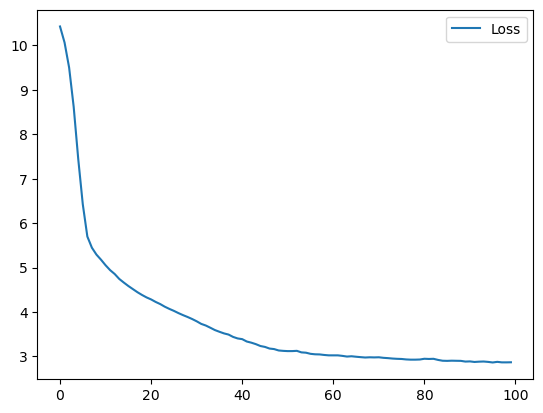

In [93]:
# plot history
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

In [94]:
# make a prediction
y_test_pred = model.predict(x_test)
# check length
y_test_pred.shape, y_test.shape

5/5 [==============================] - 0s 1ms/step


((140, 1), (140,))

In [95]:
X_train

driverRef_alonso  driverRef_bottas  \
constructorRef firstDriver year   round                                       
alphatauri     0           2022.0 1.0                 0.0               0.0   
                                  2.0                 0.0               0.0   
                                  3.0                 0.0               0.0   
                                  5.0                 0.0               0.0   
                                  6.0                 0.0               0.0   
...                                                   ...               ...   
mclaren        0           2023.0 1.0                 0.0               0.0   
                                  2.0                 0.0               0.0   
                                  3.0                 0.0               0.0   
                                  4.0                 0.0               0.0   
                                  5.0                 0.0               0.0   

                                         driverRef_de_vries  driverRef_gasly  \
constructorRef firstDriver year   round                                        
alphatauri     0           2022.0 1.0                   0.0              1.0   
                                  2.0                   0.0              1.0   
                                  3.0                   0.0              1.0   
                                  5.0                   0.0              1.0   
                                  6.0                   0.0              1.0   
...                                                     ...              ...   
mclaren        0           2023.0 1.0                   0.0              0.0   
                                  2.0                   0.0              0.0   
                                  3.0                   0.0              0.0   
                                  4.0                   0.0              0.0   
                                  5.0                   0.0              0.0   

                                         driverRef_hamilton  \
constructorRef firstDriver year   round                       
alphatauri     0           2022.0 1.0                   0.0   
                                  2.0                   0.0   
                                  3.0                   0.0   
                                  5.0                   0.0   
                                  6.0                   0.0   
...                                                     ...   
mclaren        0           2023.0 1.0                   0.0   
                                  2.0                   0.0   
                                  3.0                   0.0   
                                  4.0                   0.0   
                                  5.0                   0.0   

                                         driverRef_hulkenberg  \
constructorRef firstDriver year   round                         
alphatauri     0           2022.0 1.0                     0.0   
                                  2.0                     0.0   
                                  3.0                     0.0   
                                  5.0                     0.0   
                                  6.0                     0.0   
...                                                       ...   
mclaren        0           2023.0 1.0                     0.0   
                                  2.0                     0.0   
                                  3.0                     0.0   
                                  4.0                     0.0   
                                  5.0                     0.0   

                                         driverRef_kevin_magnussen  \
constructorRef firstDriver year   round                              
alphatauri     0           2022.0 1.0                          0.0   
                                  2.0                          0.0   
                          

In [96]:
evaluation = pd.DataFrame()
evaluation[['constructorRef', 'firstDriver', 'year', 'round']] = X_test.reset_index()[
    ['constructorRef', 'firstDriver', 'year', 'round']]
evaluation['prediction'] = [i[0] for i in y_test_pred]
evaluation['position'] = y_test
evaluation

,constructorRef,firstDriver,year,round,prediction,position
0,alphatauri,0,2023.0,6.0,15.098101,12.0
1,alphatauri,0,2023.0,7.0,15.511846,14.0
2,alphatauri,0,2023.0,8.0,14.357927,18.0
3,alphatauri,0,2023.0,9.0,13.028767,17.0
4,alphatauri,0,2023.0,10.0,17.378374,17.0
...,...,...,...,...,...,...
135,mclaren,0,2023.0,8.0,13.714031,11.0
136,mclaren,0,2023.0,9.0,15.571815,16.0
137,mclaren,0,2023.0,10.0,11.344718,4.0
138,mclaren,0,2023.0,11.0,13.814736,5.0


In [97]:
# Assuming 'evaluation' and 'data2223' are DataFrames, and 'date' is a common column
evaluation = pd.merge(evaluation, data2223[['constructorRef', 'firstDriver', 'year', 'round', 'driverRef']], 
         on=['constructorRef', 'firstDriver', 'year', 'round'], how='left')

In [98]:
# Rank the 'prediction' values within each 'round'
evaluation['positionPrediction'] = evaluation.groupby('round')['prediction'].rank(ascending=False)

# Transform ranks to positions (20 to 1)
evaluation['positionPrediction'] = 20 - evaluation['positionPrediction'] + 1

In [99]:
evaluation

,constructorRef,firstDriver,year,round,prediction,position,driverRef,positionPrediction
0,alphatauri,0,2023.0,6.0,15.098101,12.0,de_vries,16.0
1,alphatauri,0,2023.0,7.0,15.511846,14.0,de_vries,19.0
2,alphatauri,0,2023.0,8.0,14.357927,18.0,de_vries,19.0
3,alphatauri,0,2023.0,9.0,13.028767,17.0,de_vries,14.0
4,alphatauri,0,2023.0,10.0,17.378374,17.0,de_vries,20.0
...,...,...,...,...,...,...,...,...
135,mclaren,0,2023.0,8.0,13.714031,11.0,piastri,16.0
136,mclaren,0,2023.0,9.0,15.571815,16.0,piastri,19.0
137,mclaren,0,2023.0,10.0,11.344718,4.0,piastri,12.0
138,mclaren,0,2023.0,11.0,13.814736,5.0,piastri,13.0


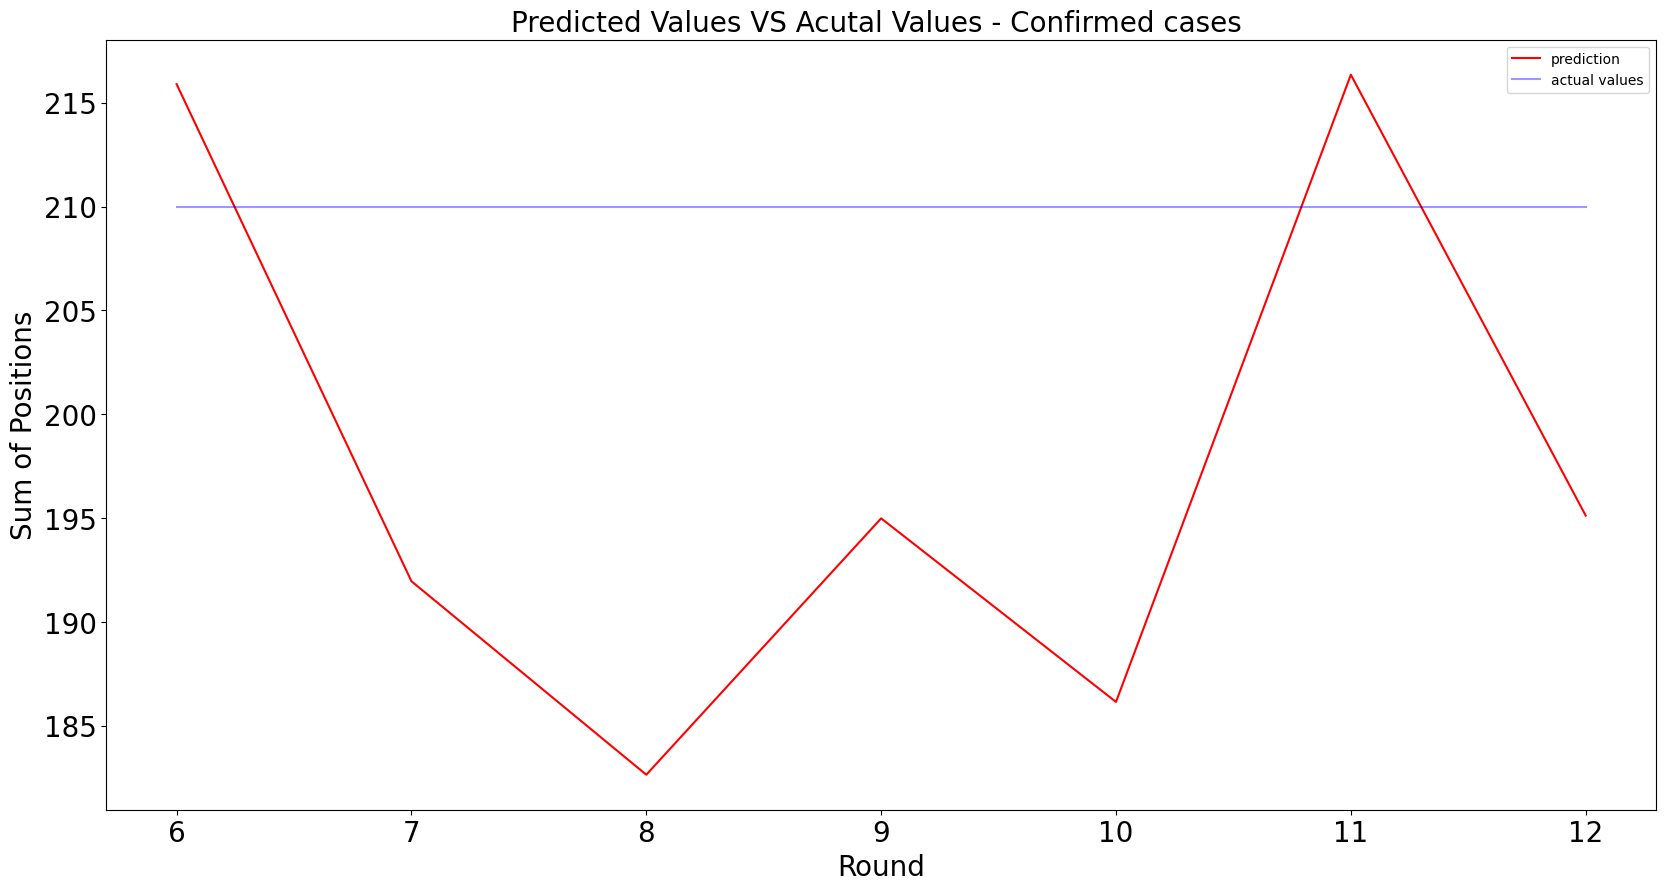

In [100]:
plt.figure(figsize=(20,10))
evaluation.groupby('round')['prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
evaluation.groupby('round')['position'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(size=20)
plt.yticks(size=20)

plt.ylabel('Sum of Positions',fontsize=20)
plt.xlabel('Round',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Confirmed cases ',fontsize=20)
plt.legend()

In [101]:
from sklearn.metrics import mean_absolute_error

In [102]:
print(mean_absolute_error(y_test, [i[0] for i in y_test_pred]))

2.7080402


In [103]:
print(mean_absolute_error(evaluation['position'], evaluation['positionPrediction']))

2.842857142857143


In [104]:
from sklearn.metrics import r2_score

In [105]:
r2_score(y_test, [i[0] for i in y_test_pred])

0.563200996549841

In [106]:
r2_score(evaluation['position'], evaluation['positionPrediction'])

0.5114930182599355

In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(evaluation['position'], evaluation['positionPrediction']))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         7
         2.0       0.14      0.14      0.14         7
         3.0       0.29      0.29      0.29         7
         4.0       0.43      0.43      0.43         7
         5.0       0.14      0.14      0.14         7
         6.0       0.57      0.57      0.57         7
         7.0       0.00      0.00      0.00         7
         8.0       0.14      0.14      0.14         7
         9.0       0.14      0.14      0.14         7
        10.0       0.00      0.00      0.00         7
        11.0       0.14      0.14      0.14         7
        12.0       0.29      0.29      0.29         7
        13.0       0.00      0.00      0.00         7
        14.0       0.00      0.00      0.00         7
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00         7
        17.0       0.00      0.00      0.00         7
        18.0       0.14    

In [109]:
print(mean_absolute_error(y_test[:-1],[i[0] for i in y_test_pred][1:]))

3.5474293


In [110]:
# def normalization_train_test_split(driver):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled = scaler.fit_transform(driver.drop(columns=['positionOrder', 'constructorRef', 'firstDriver', 'year', 'round']))
#     # create datefrane fir scaled data
#     scaled_df=pd.DataFrame(data=scaled,columns=driver.drop(columns=['positionOrder', 'constructorRef', 'firstDriver', 'year', 'round']).columns)
#     scaled_df['positionOrder']=list(driver.positionOrder)
#     X_train, X_test,Y_train,Y_test=train_test_split(scaled_df)
#     #combine x train and y train as train data 
#     train_data=pd.DataFrame()
#     train_data[X_train.columns]=X_train
#     train_data['positionOrder']=Y_train
#     #combine x test and y test as test data 
#     test_data=pd.DataFrame()
#     test_data[X_test.columns]=X_test
#     test_data['positionOrder']=Y_test

#     # using the function to obtian reshaped x_train,x_test,y_train,y_test
#     x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)
#     return x_train, x_test,y_train,y_test

In [111]:
# for i in range(len(seats)): 
#      # obtian one country's data 
#     driver = train[(train.constructorRef == seats[i][0]) & (train.firstDriver == seats[i][1])]
#     # train test split, nomalization and reshape the data
#     x_train, x_test, y_train, y_test = normalization_train_test_split(driver)
#     # model 
#     model = Sequential()
#     model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))
#     model.add(Dense(1))
#     model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#     # fit network
#     history = model.fit(x_train, y_train, epochs=50, batch_size=30, verbose=0, shuffle=False)
#     # make a prediction
#     y_test_pred = model.predict(x_test)
#     print('{} - MAE: {}'.format(seats[i], mean_absolute_error(y_test[:-1], [i[0] for i in y_test_pred][1:])))
#     #create new dataframe for plot 
#     pa=pd.DataFrame()
#     pa['Date']=list(driver.date.iloc[int(len(driver)*0.8):])[1:-1]
#     pa['Prediction']=[i[0] for i in y_test_pred][1:] 
#     pa['Actual Values']=list(y_test[:-1])

#     plt.figure(figsize=(20,10))
#     pa.groupby('rate')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
#     pa.groupby('round')['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.ylabel('Fatalities',fontsize=20)
#     plt.xlabel('Date',fontsize=20)
#     plt.title('Predicted Values VS Acutal Values - Confirmed cases in {}'.format(seats[i]),fontsize=20)
#     plt.legend()

# Feature Selection

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

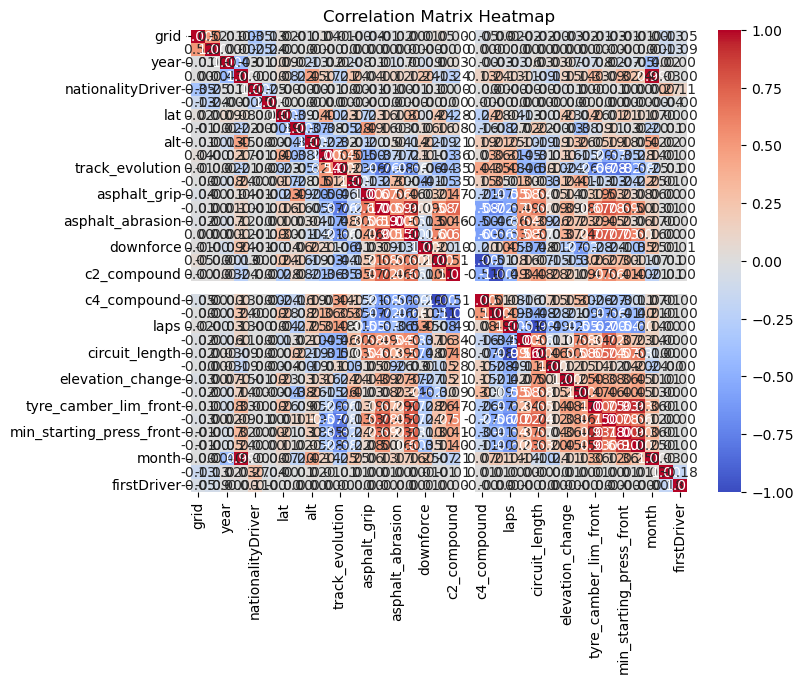

In [113]:
# Calculating correlation matrix
corr_matrix = data2223.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
def vif(X):
    '''
    Calculate Variance Inflation Factor (VIF) for each feature to detect multicollinearity.

    Parameters:
    -----------
    X : pandas.DataFrame or array-like
        The feature matrix.

    Returns:
    --------
    None

    Notes:
    ------
    - Calculates VIF for each feature in the given feature matrix.
    - Identifies variables with moderate and high multicollinearity based on a threshold.
    - Prints the variables with moderate and high multicollinearity.
    '''
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Set the threshold for high multicollinearity
    threshold = 5

    # Print variables with moderate multicollinearity
    moderate_multicollinearity = vif_data[vif_data["VIF Factor"] <= threshold].sort_values(by='VIF Factor', ascending=True)
    print("Variables with Moderate Multicollinearity:")
    print(moderate_multicollinearity)

    # Print variables with high multicollinearity
    print("\nVariables with High Multicollinearity (discard):")
    print(vif_data[vif_data["VIF Factor"] > threshold].sort_values(by='VIF Factor', ascending=True))


In [116]:
vif(train_scaled)

Variables with Moderate Multicollinearity:
              Features  VIF Factor
7     driverRef_latifi    1.684727
79                grid    1.840284
18  driverRef_sargeant    3.079283
14   driverRef_piastri    3.181247
19    driverRef_stroll    3.887512
22      driverRef_zhou    4.432174

Variables with High Multicollinearity (discard):
                     Features  VIF Factor
20          driverRef_tsunoda    5.925391
15        driverRef_ricciardo    8.126250
13            driverRef_perez   10.436573
81     nationalityConstructor   35.205130
109                       age  131.642969
..                        ...         ...
36     circuitRef_silverstone         inf
35       circuitRef_rodriguez         inf
34   circuitRef_red_bull_ring         inf
32          circuitRef_monaco         inf
56               location_Spa         inf

[103 rows x 2 columns]


In [117]:
variables_to_drop = []

for col, var in train_scaled.var().items():
    if var == 0:
        variables_to_drop.append(col)

variables_to_drop
# variables_to_drop.drop(columns=variables_to_drop, inplace=True)

['c3_compound']

In [118]:
from sklearn.linear_model import LassoCV

In [119]:
def lasso_method(X, y):
    '''
    Perform feature selection using Lasso regression and visualize feature importance.

    Parameters:
    -----------
    X : pandas.DataFrame
        Feature matrix.

    y : pandas.Series
        Target variable.

    Returns:
    --------
    None

    Notes:
    ------
    - Fits a LassoCV model to perform feature selection.
    - Plots and visualizes feature importance based on Lasso coefficients.
    '''
    # Fit LassoCV model
    reg = LassoCV()
    reg.fit(X, y)
    
    # Extract feature coefficients and index them with column names
    coef = pd.Series(reg.coef_, index=X.columns)
    
    # Sort coefficients by magnitude
    imp_coef = coef.sort_values()
    
    return imp_coef
    # # Plot feature importance using horizontal bar plot
    # imp_coef.plot(kind="barh", color='gold')
    # # plt.title("Feature importance using Lasso Model")
    # # plt.xlabel("Coefficient magnitude")
    # # plt.ylabel("Features")
    # # plt.show()

In [120]:
lasso_coefs = lasso_method(train_scaled, train['positionOrder'])

In [121]:
lasso_coefs

driverRef_perez            -2.952909
driverRef_max_verstappen   -2.830855
nationalityConstructor     -2.702655
nationalityDriver          -1.677626
driverRef_hamilton         -1.057427
                              ...   
circuitRef_red_bull_ring    0.000000
circuitRef_monza           -0.000000
circuitRef_miami            0.000000
age                        -0.000000
grid                        6.466773
Length: 110, dtype: float64

In [122]:
lasso_coefs.items()

In [123]:
variables_to_drop_by_lasso = []

for col, coef in lasso_coefs.items():
    if coef == 0:
        variables_to_drop_by_lasso.append(col)


len(variables_to_drop_by_lasso)
# variables_to_drop.drop(columns=variables_to_drop_by_lasso, inplace=True)
        

102

In [124]:
train_fs = train_scaled.drop(columns=variables_to_drop_by_lasso)

In [125]:
train_fs

,driverRef_hamilton,driverRef_leclerc,driverRef_max_verstappen,driverRef_perez,driverRef_russell,grid,nationalityDriver,nationalityConstructor
0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.60,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.70,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.85,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.75,0.0,1.0
...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.0,0.0,0.45,0.0,1.0
636,0.0,0.0,0.0,0.0,0.0,0.50,0.0,1.0
637,0.0,0.0,0.0,0.0,0.0,0.40,0.0,1.0
638,0.0,0.0,0.0,0.0,0.0,0.80,0.0,1.0
